# Time Series Forecast stock market prices whit Recurrent Neuro Network (RNN)

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/bruno/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bruno/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bruno/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/bruno/anaco

### Read the training database (Stock Exchange 2013-217)

In [2]:
base = pd.read_csv('petr4-treinamento.csv')
base = base.dropna()
base_treinamento = base.iloc[:, 1:2].values

normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

### Create data predictors

In [3]:
previsores = []
preco_real = []
for i in range(90, 1242):
    previsores.append(base_treinamento_normalizada[i-90:i, 0])
    preco_real.append(base_treinamento_normalizada[i, 0])
previsores, preco_real = np.array(previsores), np.array(preco_real)
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))

### Create model RNN

In [4]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], 1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1, activation = 'linear'))

regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error',
                  metrics = ['mean_absolute_error'])
regressor.fit(previsores, preco_real, epochs = 100, batch_size = 32)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
1152/1152 [==============================] - 29s 25ms/step - loss: 0.0335 - mean_absolute_error: 0.1315
Epoch 2/100
1152/1152 [==============================] - 25s 22ms/step - loss: 0.0151 - mean_absolute_error: 0.0966
Epoch 3/100
1152/1152 [==============================] - 26s 22ms/step - loss: 0.0108 - mean_absolute_error: 0.0808
Epoch 4/100
1152/1152 [==============================] - 25s 22ms/step - loss: 0.0101 - mean_absolute_error: 0.0766
Epoch 5/100
1152/1152 [==============================] - 26s 23ms/step - loss: 0.0103 - mean_absolute_error: 0.0765
Epoch 6/100
1152/1152 [==============================] - 25s 22ms/step - loss: 0.0085 - mean_absolute_error: 0.0714
Epoch 7/100
1152/1152 [==============================] - 24s 21ms/step - loss: 0.0082 - m

In [7]:
base_teste = pd.read_csv('petr4-teste.csv')
preco_real_teste = base_teste.iloc[:, 1:2].values
base_completa = pd.concat((base['Open'], base_teste['Open']), axis = 0)
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = entradas.reshape(-1, 1)
entradas = normalizador.transform(entradas)

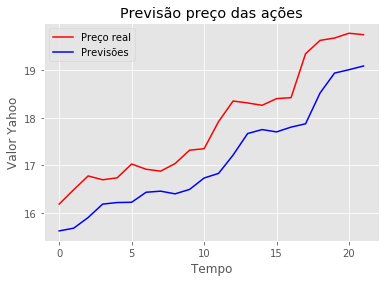

In [14]:
X_teste = []
for i in range(90, 112):
    X_teste.append(entradas[i-90:i, 0])
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))
previsoes = regressor.predict(X_teste)
previsoes = normalizador.inverse_transform(previsoes)

previsoes.mean()
preco_real_teste.mean()
plt.style.use('ggplot')
plt.plot(preco_real_teste, color = 'red', label = 'Preço real')
plt.plot(previsoes, color = 'blue', label = 'Previsões')
plt.title('Previsão preço das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()
plt.show()



In [11]:
print(preco_real_teste)


[[16.190001]
 [16.49    ]
 [16.780001]
 [16.700001]
 [16.74    ]
 [17.030001]
 [16.92    ]
 [16.879999]
 [17.040001]
 [17.32    ]
 [17.35    ]
 [17.92    ]
 [18.35    ]
 [18.309999]
 [18.26    ]
 [18.4     ]
 [18.42    ]
 [19.34    ]
 [19.620001]
 [19.67    ]
 [19.77    ]
 [19.74    ]]


In [12]:
print(previsoes)

[[15.628004]
 [15.68514 ]
 [15.908831]
 [16.18995 ]
 [16.222366]
 [16.228266]
 [16.438461]
 [16.460833]
 [16.40489 ]
 [16.497887]
 [16.736294]
 [16.833408]
 [17.217615]
 [17.667757]
 [17.75133 ]
 [17.702831]
 [17.80305 ]
 [17.872196]
 [18.517366]
 [18.935171]
 [19.00623 ]
 [19.084171]]
